In [5]:
# import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# sns.set_style("whitegrid")

from attrdict import AttrDict
from drivers import *
import os
import seaborn as sns
import results

<AxesSubplot:xlabel='NS', ylabel='ACC'>

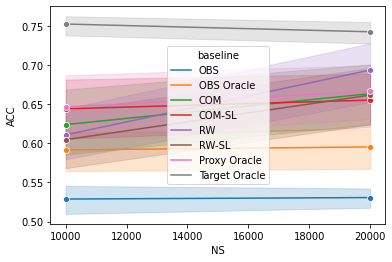

In [28]:
df, meandf  = results.get_erm_convergence_result_df('erm_convergence_rates_debug')

df.reset_index(inplace=True)
sns.lineplot(data=df, x="NS", y="ACC", hue='baseline', ci=95, marker='o')

In [3]:
from attrdict import AttrDict


exp_config = AttrDict({

    # Benchmark configuration
    'benchmark': {
        'name': 'synthetic_1D_sinusoidal',
        'NS': 1000,
        'config': {
            'Y0_PDF': 'piecewise_sinusoid',
            'Y1_PDF': 'low_base_rate_sinusoid',
            'PI_PDF': 'linear'
            }
    },

    'log_dir': 'results',

    'sample_sizes': [5000, 10000, 20000, 30000, 40000, 50000, 60000],
    
    # Experimental setup 
    'learn_weights': True,
    'learn_parameters': True,
    
    # Hyperparameters
    'n_epochs': 3,
    'n_runs': 1,
    
    'target_POs': [0],
    'policy_gamma': 0,
   
    # Data params
    'train_ratio': .7,
    'split_erm': True,
    'crossfit_erm': True,
    'split_ccpe': True,
    'crossfit_ccpe': True,

    'error_params': [{
        'alpha_0': 0.5,
        'alpha_1': 0,
        'beta_0': 0.1,
        'beta_1': 0 
    }],

    'baselines': [{
            'model': 'OBS',
            'target': 'Y',
            'conditional': False,
            'sl': False,
            'reweight': False
        },{
            'model': 'OBS Oracle',
            'target': 'YS',
            'conditional': False,
            'sl': False,
            'reweight': False
        },{
            'model': 'COM',
            'target': 'Y',
            'conditional': True,
            'sl': False,
            'reweight': False
        },{
            'model': 'COM-SL',
            'target': 'Y',
            'conditional': True,
            'sl': True,
            'reweight': False
        },{
            'model': 'RW',
            'target': 'Y',
            'conditional': True,
            'sl': False,
            'reweight': True
        },{
            'model': 'RW-SL',
            'target': 'Y',
            'conditional': True,
            'sl': True,
            'reweight': True
        },{
            'model': 'Proxy Oracle',
            'target': f'Y',
            'conditional': True,
            'sl': False,
            'reweight': False
        },{
            'model': 'Target Oracle',
            'target': f'YS',
            'conditional': True,
            'sl': False,
            'reweight': False
    }]
})

In [2]:
exp_config = AttrDict({
#     'benchmark': {
#         'name': 'synthetic_1D_sinusoidal',
#         'NS': 1000,
#         'config': {
#             'Y0_PDF': 'piecewise_sinusoid',
#             'Y1_PDF': 'low_base_rate_sinusoid',
#             'PI_PDF': 'linear'
#             }
#     },
    
    'benchmark': {
        'name': 'synthetic_2D_linsep',
        'NS': 5000,
        'config': {
            'Y0_PDF': '2D_linsep_baseline',
            'Y1_PDF': '2D_linsep_intervention',
            'PI_PDF': '6cov_linear'
        }
    },
    
    'log_dir': 'results',
    
    # Experimental setup 
    'learn_weights': True,
    'learn_parameters': True,
    
    # Hyperparameters
    'n_epochs': 3,
    'n_runs': 1,
    
    'target_POs': [0, 1],
    
    'policy_gamma': 0,
    'train_ratio': .7,
    
    'split_erm': True,
    'crossfit_erm': True,
    'split_ccpe': True,
    'crossfit_ccpe': True,
})

error_params = [AttrDict({
    'alpha_0': 0.5,
    'alpha_1': 0,
    'beta_0': 0.1,
    'beta_1': 0 
})]

# baselines = [AttrDict({
#     'model': 'OBS',
#     'target': 'Y',
#     'conditional': False,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'OBS Oracle',
#     'target': 'YS',
#     'conditional': False,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'COM',
#     'target': 'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'COM-SL',
#     'target': 'Y',
#     'conditional': True,
#     'sl': True,
#     'reweight': False
# }), AttrDict({
#     'model': 'RW',
#     'target': 'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': True
# }), AttrDict({
#     'model': 'RW-SL',
#     'target': 'Y',
#     'conditional': True,
#     'sl': True,
#     'reweight': True
# }), AttrDict({
#     'model': 'Proxy Oracle',
#     'target': f'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'Target Oracle',
#     'target': f'YS',
#     'conditional': True,
#     'sl': True,
#     'reweight': False
# })]
baselines = [AttrDict({
    'model': 'Target Oracle',
    'target': f'YS',
    'conditional': True,
    'sl': False,
    'reweight': False
})]

po_results, te_results =  run_risk_minimization_exp(exp_config, baselines, error_params, exp_name='synth_baseline_comparison')



AttributeError: 'AttrDict' instance has no attribute 'sample_sizes'

## Debugging JOBS performance

In [1]:
from attrdict import AttrDict
from data import loaders
from model import MLP, train, evaluate
import numpy as np
import matplotlib.pyplot as plt
import drivers, erm

/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = AttrDict({
  "benchmarks": [{ "name": "ohie", "path": "data/OHIE/ohie_data.csv", "policy_gamma": 0 },{
      "name": "jobs",
      "train_path": "data/JOBS/jobs_DW_bin.new.10.train.npz",
      "test_path": "data/JOBS/jobs_DW_bin.new.10.test.npz"
    }],
  "log_dir": "results",
  "sample_sizes": [12994],
  "learn_weights": False,
  "learn_parameters": False,
  "lr": 0.001,
  "milestone": 20,
  "gamma": 0.5,
  "n_epochs": 25,
  "n_runs": 1,
  "target_POs": [0, 1],
  "policy_gamma": 0,
  "train_ratio": 0.7,
  "split_erm": False,
  "crossfit_erm": False,
  "split_ccpe": False,
  "crossfit_ccpe": False,
  "error_params": [
    { "alpha_0": 0.2, "alpha_1": 0, "beta_0": 0.2, "beta_1": 0 },
  ],
  "baselines": [{
      "model": "Target Oracle",
      "target": "YS",
      "conditional": True,
      "sl": False,
      "reweight": False
  }]
})

loss_config = AttrDict({
    'alpha': None,
    'beta':  None,
    'do': 0,
    'reweight': False,
    'sl': False
})

for i in range(5):

    X_train, X_test, Y_train, Y_test = loaders.get_benchmark(config.benchmarks[0], config.error_params[0], 10000)

    dataset = AttrDict({
        'X_train': X_train,
        'X_test': X_test,
        'Y_train': Y_train,
        'Y_test': Y_test
    })


    preds, metrics = erm.run_erm_split(
                    erm_dataset=dataset,
                    baseline_config=config.baselines[0],
                    loss_config=loss_config,
                    exp_config=config
                )

    print('ATE: estimate', preds[1][Y_test['E'] == 1].mean() - preds[0][Y_test['E'] == 1].mean())
    
    print('ATE: estimate 2', (preds[1][Y_test['E'] == 1]  - preds[0][Y_test['E'] == 1]).mean())


Using JOBS model


ERM: Target Oracle: 100%|███████████████████████| 25/25 [00:20<00:00,  1.24it/s]


Train loss: [55.498799838125706, 36.5155463963747, 35.737919710576534, 35.1994411572814, 34.86042211204767, 34.4476087205112, 34.19595143198967, 33.89981887489557, 33.55662855505943, 33.246166944503784, 32.775661788880825, 32.49564774334431, 32.37554873526096, 31.711387012153864, 31.182779736816883, 31.213830389082432, 30.614551339298487, 29.75575526058674, 29.963013254106045, 29.329770732671022, 28.33894257619977, 27.80970575287938, 27.593957122415304, 27.28050622344017, 27.16163082793355]
Val loss: 0.22423803635308004
Using JOBS model


ERM: Target Oracle: 100%|███████████████████████| 25/25 [00:19<00:00,  1.31it/s]


Train loss: [55.52417080104351, 37.40014584362507, 36.703165248036385, 36.161987245082855, 35.69456134736538, 35.70485994964838, 35.28097138553858, 34.86364238709211, 34.61031599342823, 34.283927999436855, 33.69974437355995, 33.3394760787487, 33.13160429894924, 32.47317486256361, 32.25880625844002, 31.79664259031415, 31.50195311009884, 30.979285687208176, 30.2551836296916, 30.563268799334764, 29.268382538110018, 28.720219563692808, 28.556961722671986, 28.371347546577454, 28.0500385761261]
Val loss: 0.2790089044414583
ATE: estimate 0.017646685
ATE: estimate 2 0.01764669
Using JOBS model


ERM: Target Oracle: 100%|███████████████████████| 25/25 [00:20<00:00,  1.24it/s]


Train loss: [55.544187255203724, 37.47368028014898, 36.61499737948179, 36.34912118315697, 35.941113002598286, 35.65306082740426, 35.154080003499985, 34.67449031025171, 34.315977945923805, 33.633972983807325, 33.492783430963755, 33.19658685103059, 32.23978664726019, 32.037650894373655, 31.986251156777143, 31.145768083631992, 30.56905435398221, 29.854682844132185, 29.961558762937784, 29.418482705950737, 28.107947248965502, 27.602935425937176, 27.37673756107688, 27.170012336224318, 26.857446756213903]
Val loss: 0.2323946765028551
Using JOBS model


ERM: Target Oracle: 100%|███████████████████████| 25/25 [00:20<00:00,  1.23it/s]


Train loss: [52.28172957897186, 37.77889836579561, 36.63477782160044, 36.43747101724148, 35.93429517745972, 36.02966766059399, 35.53091850876808, 35.01395229995251, 34.82826393097639, 34.45004568994045, 34.15521799772978, 33.52482125163078, 33.01253443956375, 32.83680284023285, 31.726390093564987, 31.678029246628284, 30.91450595855713, 30.760547876358032, 30.17917451635003, 29.583351224660873, 28.26094014942646, 27.963247638195753, 27.7666587382555, 27.284188312478364, 26.991046667099]
Val loss: 0.252971462355774
ATE: estimate -0.0100519955
ATE: estimate 2 -0.010051998
Using JOBS model


ERM: Target Oracle: 100%|███████████████████████| 25/25 [00:20<00:00,  1.21it/s]


Train loss: [54.448229886591434, 36.62720458954573, 35.81726521626115, 35.395141176879406, 35.03565090894699, 34.79760806262493, 34.47676366567612, 34.220121406018734, 34.03898520767689, 33.49998331815004, 33.258728202432394, 33.191505152732134, 32.64450340718031, 32.522206731140614, 31.872813627123833, 31.5663417391479, 31.171057116240263, 30.57438214123249, 30.597594380378723, 30.174285158514977, 28.894275952130556, 28.387981086969376, 28.11199722252786, 27.981960151344538, 27.763418156653643]
Val loss: 0.24386915427128805
Using JOBS model


ERM: Target Oracle: 100%|███████████████████████| 25/25 [00:19<00:00,  1.30it/s]


Train loss: [57.745187021791935, 38.32539654523134, 37.573817268013954, 37.13597074151039, 36.884030893445015, 36.52659283578396, 36.1391414552927, 35.93137525767088, 35.452229246497154, 35.04777950793505, 34.748583637177944, 34.21238377690315, 33.781578220427036, 32.90033435821533, 32.45184438303113, 31.98843329027295, 31.21319342404604, 30.86593496799469, 30.044683009386063, 29.608236141502857, 28.350803181529045, 28.139806479215622, 27.572050601243973, 27.310512199997902, 27.17464378476143]
Val loss: 0.2914524599909783
ATE: estimate 0.027160056
ATE: estimate 2 0.027160058
Using JOBS model


ERM: Target Oracle: 100%|███████████████████████| 25/25 [00:20<00:00,  1.21it/s]


Train loss: [53.06980723887682, 37.913237400352955, 37.771202728152275, 36.940763764083385, 36.398956678807735, 36.210724994540215, 36.25745699554682, 35.91572214663029, 35.57331711053848, 35.299029015004635, 34.974358916282654, 34.40318136289716, 34.0155735835433, 34.11100462824106, 32.73450422286987, 32.31845451518893, 32.3547915071249, 31.236909419298172, 31.76458713784814, 30.479728776961565, 29.49636173248291, 29.06877663359046, 29.186958760023117, 29.11990823224187, 28.720793031156063]
Val loss: 0.21213724451964014
Using JOBS model


ERM: Target Oracle: 100%|███████████████████████| 25/25 [00:21<00:00,  1.15it/s]


Train loss: [62.13875002413988, 37.76561828702688, 36.99672989742248, 36.71723734587431, 36.3644830211997, 36.09675054252148, 35.64592389025711, 35.278136141599816, 35.097681142389774, 36.000487223267555, 35.470030285418034, 34.26766078919172, 33.73797705769539, 33.989443112164736, 33.87860947102308, 32.9315232783556, 32.257449973374605, 31.903083980083466, 31.8538061901927, 31.084932878613472, 31.27571353316307, 29.833648327738047, 29.52065595984459, 30.582529678940773, 29.161217361688614]
Val loss: 0.23521710544458194
ATE: estimate 0.00026733428
ATE: estimate 2 0.00026734176
Using JOBS model


ERM: Target Oracle:  24%|█████▊                  | 6/25 [00:05<00:17,  1.06it/s]
  File "<string>", line 1, in <module>
  File "/usr/local/Cellar/python@3.9/3.9.8/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/usr/local/Cellar/python@3.9/3.9.8/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/torch/__init__.py", line 751, in <module>
    from .functional import *  # noqa: F403
  File "/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/torch/functional.py", line 8, in <module>
    import torch.nn.functional as F
  File "/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/torch/nn/__init__.py", line 1, in <module>
    from .modules import *  # noqa: F403
  File "/Users

RuntimeError: DataLoader worker (pid 46305) is killed by signal: Interrupt: 2. 

In [149]:
def compute_policy_risk(YS, YS_1_hat, YS_0_hat, pD, D):

    policy_risk_cutoffs = {}

    for gamma in [-.3, -.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6]:
    
        # Simulate treatment policy
        pi = np.zeros_like(D)
        pi[YS_1_hat-YS_0_hat < gamma] = 1

        # Compute propensities via ''ground truth'' treatment probabilities
        inv_weights = np.zeros_like(D)
        inv_weights[D==1] = D.mean()
        inv_weights[D==0] = 1-D.mean()
        inv_weights = 1/inv_weights

        # Compute policy risk
        # Ommit reweighting to match Johannason et al (for now). It is strange that
        # matching their plot with accet/reject baserates requires removing re-weighting
        # given that treatment probabilities are not .5
        policy_risk_num = (YS[pi == D]).sum()
        policy_risk_demon = (pi == D).sum()

        policy_risk_cutoffs[f'pr_{gamma}'] = policy_risk_num/policy_risk_demon

    return policy_risk_cutoffs


In [6]:

pD = Y_test['pD'][Y_test['E'] == 1]
D = Y_test['D'][Y_test['E'] == 1]
YS = Y_test['YS'][Y_test['E'] == 1]

YS_1_hat = preds[1][Y_test['E'] == 1]
YS_0_hat = preds[0][Y_test['E'] == 1]

# Simulate treatment policy
pi = np.zeros_like(D)
pi[YS_1_hat-YS_0_hat < -.6] = 1

# Compute propensities via ''ground truth'' treatment probabilities
inv_weights = np.zeros_like(D)
inv_weights[D==1] = D.mean()
inv_weights[D==0] = 1-D.mean()
inv_weights = 1/inv_weights

# Compute policy risk
policy_risk_num = (YS[pi == D]*inv_weights[pi == D]).sum()
policy_risk_demon = (pi == D).sum()


policy_risk_num/policy_risk_demon



/var/folders/w_/rwxvw5hn1ng2qvm6353gkvqw0000gr/T/ipykernel_24171/2022111065.py:16: RuntimeWarning: divide by zero encountered in true_divide
  inv_weights = 1/inv_weights


inf

In [141]:
1-D.mean()

0.6163934426229508

In [133]:
Y_test[Y_test['E'] == 1]['D'].mean()
pD.mean()

0.09246575342465756

In [129]:
compute_policy_risk

<function __main__.compute_policy_risk(YS, YS_1_hat, YS_0_hat, pD, D)>

In [150]:



compute_policy_risk(YS, pys1, pys0, pD, D)

{'pr_-0.3': 0.5579180892950915,
 'pr_-0.25': 0.5550402242556498,
 'pr_-0.2': 0.5633738219783275,
 'pr_-0.15': 0.6219568518779454,
 'pr_-0.1': 0.6501246979970384,
 'pr_-0.05': 0.6151985122213195,
 'pr_0': 0.607900382414721,
 'pr_0.05': 0.6319427516801894,
 'pr_0.1': 0.6947674696834831,
 'pr_0.15': 0.6486406619385343,
 'pr_0.2': 0.6104604962552397,
 'pr_0.25': 0.6135774686306602,
 'pr_0.3': 0.6051004689928343,
 'pr_0.35': 0.6015779092702168,
 'pr_0.4': 0.6067639257294428,
 'pr_0.45': 0.6015779092702169,
 'pr_0.5': 0.6015779092702169,
 'pr_0.55': 0.6015779092702169,
 'pr_0.6': 0.6015779092702169}

In [36]:
preds[1][Y_test['E'] == 1].mean() - preds[0][Y_test['E'] == 1].mean()

-0.030462354

In [ ]:
preds[1] - preds[0]

In [26]:
Y_test[(Y_test['E'] == 1) & (Y_test['D'] == 0)]['YS_0'].mean()

0.3191489361702128

In [23]:
Y_test[(Y_test['E'] == 1) & (Y_test['D'] == 1)]['YS_1'].mean() - Y_test[(Y_test['E'] == 1) & (Y_test['D'] == 0)]['YS_0'].mean()


-0.088379705400982

In [14]:
Y_test['YS_0'].mean()

0.15566625155666253

In [ ]:
preds[0].mean()

In [11]:
preds[1].mean() 

0.27853668

0.18840663

In [10]:
te_df.columns.tolist()

['alpha_0',
 'alpha_1',
 'beta_0',
 'beta_1',
 'alpha_0_hat',
 'beta_0_hat',
 'alpha_1_hat',
 'beta_1_hat',
 'benchmark',
 'NS',
 'val_loss',
 'ate',
 'ate_hat',
 'ate_error',
 'pr_-0.3',
 'pr_-0.25',
 'pr_-0.2',
 'pr_-0.15',
 'pr_-0.1',
 'pr_-0.05',
 'pr_0',
 'pr_0.05',
 'pr_0.1',
 'pr_0.15',
 'pr_0.2',
 'pr_0.25',
 'pr_0.3',
 'pr_0.35',
 'pr_0.4',
 'pr_0.45',
 'pr_0.5',
 'pr_0.55',
 'pr_0.6',
 'baseline']

## Debugging synthetic environment configuration

In [2]:
from attrdict import AttrDict
from data import loaders
from model import MLP, train, evaluate
import numpy as np
import matplotlib.pyplot as plt

In [15]:
benchmark =  AttrDict({
    'name': 'synthetic_1D_sinusoidal',
    'NS': 10000,
    'config': {
        'Y0_PDF': 'piecewise_sinusoid',
        'Y1_PDF': 'low_base_rate_sinusoid',
        'PI_PDF': 'linear'
        }
})

error_params = AttrDict({
    'alpha_0': 0.1,
    'alpha_1': 0,
    'beta_0': 0.3,
    'beta_1': 0 
})

for i in range(2):

    X_train, X_test, Y_train, Y_test = loaders.get_benchmark(benchmark, error_params, 60000)

    train_loader, test_loader = loaders.get_loaders(
        X_train=X_train,
        YCF_train=Y_train,
        X_test=X_test,
        YCF_test=Y_test,
        target='Y', 
        do=0,
        conditional=True
    )

    loss_config = AttrDict({
            'alpha': None,
            'beta':  None,
            'do': 0,
            'reweight': False
        })


    eta_model = MLP(n_feats=X_train.shape[1])
    train_losses = train(eta_model, train_loader, loss_config=loss_config,
                         n_epochs=10, lr=.005, milestone=10, gamma=0.1, desc="Proxy Oracle")
    metrics, py_hat  = evaluate(eta_model, test_loader)

    print('train_loss', train_losses)
    print('metrics:', metrics)
    print('alpha hat:', error_params['alpha_0'] - py_hat.min())
    print('beta hat:', error_params['beta_0'] - (1-py_hat.max()))
    
    

Proxy Oracle: 100%|█████████████████████████████| 10/10 [00:14<00:00,  1.47s/it]


train_loss [417.1732856929302, 404.11929500102997, 401.0788828134537, 399.293691188097, 395.2039424479008, 393.00864440202713, 392.35615277290344, 391.1171233654022, 391.3177989423275, 391.1796694993973]
metrics: AttrDict({'AU-ROC': 0.8380093471663737, 'ACC': 0.7540555555555556, 'loss': 0.5492091548908672})
alpha hat: -0.020846815407276148
beta hat: 0.016080009937286366


Proxy Oracle: 100%|█████████████████████████████| 10/10 [00:14<00:00,  1.40s/it]


train_loss [421.88884100317955, 418.74214458465576, 417.41608595848083, 416.97894379496574, 417.2853065431118, 416.9351713657379, 416.5809922814369, 416.94799223542213, 416.7196954488754, 416.7105756998062]
metrics: AttrDict({'AU-ROC': 0.6363336999540279, 'ACC': 0.494, 'loss': 0.6535285120535491})
alpha hat: -0.0020197942852973882
beta hat: -0.2499946177005768


<AxesSubplot:>

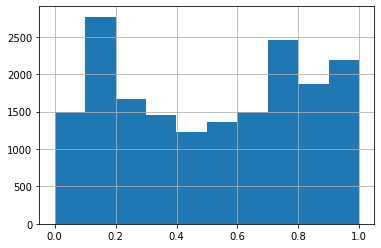

In [10]:
# Old one with performance difference
Y_test['pYS_0'].hist()

<AxesSubplot:>

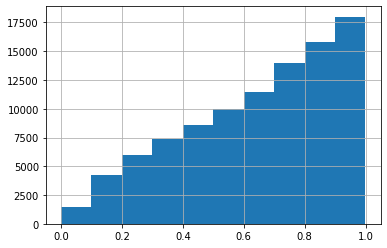

In [11]:
# Old one with performance difference
Y_test['pYS_0'].hist(cumulative=True)

In [12]:
import pandas as pd
val_preds = pd.DataFrame({
    'yhat': py_hat.squeeze(),
    'y': Y_test['pYS_0'].squeeze(),
    'x': X_test.squeeze()
})

val_preds = val_preds.sort_values(by='x')

In [13]:
print(metrics)

AttrDict({'AU-ROC': 0.8311343172234612, 'ACC': 0.6376666666666667, 'loss': 0.569290828323703})


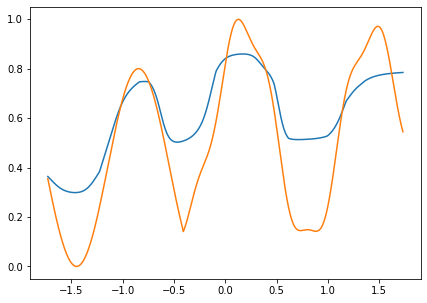

In [14]:
f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))
axs.plot(val_preds['x'], val_preds['yhat'], label=f'$\eta^*$')
axs.plot(val_preds['x'], val_preds['y'], label=f'$\eta$')

In [8]:
val_preds['yhat'].max()
val_preds['yhat'].min()

0.24906175

In [ ]:
def viz_ccpe_estimates(Y_train, Y_test, debug_info, alpha, beta, do, y0_pdf, y1_pdf, pi_pdf):

    X = expdf['X'].to_numpy()
    pdf = y0_pdf if do==0 else y1_pdf
    eta_d_star = eta(X, pdf)
    eta_d = ccn_model(eta_d_star, alpha, beta)
    pix = pi(X, pi_pdf)

    f, axs = plt.subplots(1, 1, sharey=False, figsize=(7,5))

    # Class probability functions
    axs.plot(X, eta_d_star, label=f'$\eta^*_{do}(x)$')
    axs.plot(X, eta_d, label=f'$\eta_{do}(x)$', color='black')
    axs.plot(X, pix, label='$\pi(x)$', color='orange', linestyle='--')
    plt.scatter(debug_info['val_x'], debug_info['val_py'], marker='x', color='black', label=f'$\hat\eta_{do}(x)$')
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.xlabel('X')
    plt.ylabel('P')

    plt.title(f'risk under D={do}, alpha={alpha:2}, beta={beta:2}')


In [ ]:
viz_ccpe_estimates()